Purpose: Calibrate AquaCrop OSpy for Zambia maize yield simulation   
Author: Sitian XiongcLyndon Estes, Kelly Caylor  
last update: Aug 27, 2021  


First, you will need to install Aquacrop library.  
see: https://pypi.org/project/aquacrop/

If you install the Aquacrop package with conda, then the source code of the Aquacrop usually lives  
under the environment folder's Lib\site-packages\aquacrop.  E.g., mine is:  
C:\Users\stxio\AppData\Local\conda\conda\envs\yieldmapping\Lib\site-packages\aquacrop  
We found classes.py has the most important hard-coded parameters

The next 5 cells are breakdown processes for learning/testing purpose.  
It is specified to runs for 1 station and 1 soil, but it is capable to run multiple station and soil (it has double for-loop structure).  
If you want to run multiple stations and multiple soils within one cell, go to  
**"Run a big loop for multiple stations for multiple soils"** section further below.  

The total 14463 stations are exported as shp file in "station_locations_shp folder".  You can look them on the map to see their locations.

In [1]:
from aquacrop.classes import *
from aquacrop.core import *
import os
import pandas as pd

In [22]:
# project dir.  Weather folder should under this dir.
project_path = "F://AquaCrop_F"

# if you decide to write the output to you disk, then here is the output folder (this code won't create it automatically).
out_path = 'test_stations_iwc_pop35k-2layers'

# weather folder. Each station has one csv file, like "station_1_weather.csv"
weather_path = 'some_example_weather'#'14663_Weather'

# a suffix for the output file. e.g., '2-layers_initIWC45_25_'
iwc_val_layer =  'iwc30-20_2-layers'

In [23]:
 # split soil into 2 layers (with identical soil properties) for different initialization
temp_sol = SoilClass(soilType='SiltLoam')
custom_sol = SoilClass(soilType='custom')   

custom_sol.add_layer(
          thickness=0.6, # i.e., this first layer is from 0 ~ 0.6 m
          thWP=temp_sol.profile.th_wp[0],
          thFC=temp_sol.profile.th_fc[0],
          thS=temp_sol.profile.th_s[0],
          Ksat=temp_sol.profile.Ksat[0],
          penetrability=temp_sol.profile.penetrability[0])
custom_sol.add_layer(
          thickness=0.6, # i.e., this second layer is from 0.6 ~ 1.2 m
          thWP=temp_sol.profile.th_wp[0],
          thFC=temp_sol.profile.th_fc[0],
          thS=temp_sol.profile.th_s[0],
          Ksat=temp_sol.profile.Ksat[0],
          penetrability=temp_sol.profile.penetrability[0])
pd.set_option('display.expand_frame_repr', False)
print(custom_sol.profile)

    Comp  Layer   dz  dzsum  zBot  zTop  zMid  th_dry  th_wp  th_fc  th_s   Ksat  penetrability  tau
0      0    1.0  0.1    0.1   0.1   0.0  0.05   0.065   0.13   0.33  0.46  575.0          100.0  0.8
1      1    1.0  0.1    0.2   0.2   0.1  0.15   0.065   0.13   0.33  0.46  575.0          100.0  0.8
2      2    1.0  0.1    0.3   0.3   0.2  0.25   0.065   0.13   0.33  0.46  575.0          100.0  0.8
3      3    1.0  0.1    0.4   0.4   0.3  0.35   0.065   0.13   0.33  0.46  575.0          100.0  0.8
4      4    1.0  0.1    0.5   0.5   0.4  0.45   0.065   0.13   0.33  0.46  575.0          100.0  0.8
5      5    1.0  0.1    0.6   0.6   0.5  0.55   0.065   0.13   0.33  0.46  575.0          100.0  0.8
6      6    2.0  0.1    0.7   0.7   0.6  0.65   0.065   0.13   0.33  0.46  575.0          100.0  0.8
7      7    2.0  0.1    0.8   0.8   0.7  0.75   0.065   0.13   0.33  0.46  575.0          100.0  0.8
8      8    2.0  0.1    0.9   0.9   0.8  0.85   0.065   0.13   0.33  0.46  575.0          1

Following the AquaCrop tutorial, we found the low yield are due to watter logging, caused by initial water content=field capacity, which is not true for Zambia.  In Zambia, drought leads to low yield.  
Therefore, the major task is to change the initial soil water to a more realistic state, rather than the default 'field capacity'.  
We would like to leave the soil proerties as default and only change the inital conditions.  
We will set two layers in the soil, which the top layer is moist and bottom layer is dry.  

We will test different soil types: Loamy, sandyloam, SiltyLoam,    
We would also like to test on several site in Zambia.  
The typical planting density is 3.4 maize per m2, or 34k per ha.  Therefore, we change the default 75k/ha to 35k/ha.  

For the initial soili content, we can try (1) fix number for all station; (2)Hydroblock soil moisture  

In [24]:
iwc_val = [30,20] # 30% and 20% soil water for first and second layer (need to check what's this % exactly stands for)

In [25]:

for i in [3385]: # you can actually specify multiple stations here, e.g., [3385,3006,622,11750,14407,7725,5162] or range(1,14664,1):
    print("running on " + str(i))

    filepath = os.path.join(project_path,weather_path,"station_"+ str(i) +"_weather.csv")
    weather_data = pd.read_csv(filepath)
    weather_data["Date"] = pd.to_datetime(weather_data["Date"])
    
    soil_list = ['SandyLoam'] # you can specify multiple soils ['SandyLoam','SiltLoam', 'LoamySand', 'Loam']
    
    for j in soil_list:         
        # split soil into 2 layers (with identical soil properties) for different initialization
        temp_sol = SoilClass(soilType=j)
        custom_sol = SoilClass(soilType='custom')   
    
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
    
        maize = CropClass('Maize', PlantingDate='11/15',PlantPop=35_000)
        InitWC = InitWCClass(wc_type='Pct', # wc_type= 'Pct','Prop',or 'Num'
                            Method='Layer',#'Depth',#'Layer',
                            depth_layer=[1,2],#,2,3],#[1,2,3,4,5,6,7,8,9,10,11,12],
                            value=iwc_val) # 0.2 or dynamic (Noemi's soilmoisture)/percent of rainfall
       # print(soil_class.profile)
        #exit()
        model = AquaCropModel(SimStartTime=f'{2000}/11/15',
                              SimEndTime=f'{2014}/05/30',
                              wdf=weather_data,
                              Soil=custom_sol,
                              Crop=maize,
                              InitWC=InitWC)

        # initilize model
        model.initialize()
        # run model till termination
        model.step(till_termination=True)

        #print(model.Outputs.Final)
        model.Outputs.Final.to_csv(os.path.join(project_path, out_path,"out_final"+str(i)+'_'+j+'_'+str(iwc_val_layer)+".csv"))
        model.Outputs.Growth.to_csv(os.path.join(project_path, out_path,"out_growth"+str(i)+'_'+j+'_'+str(iwc_val_layer)+".csv"))
        #model.Outputs.Flux.to_csv(os.path.join(project_path, out_path,"out_flux"+str(i)+'_'+j+'_'+str(iwc_val_layer)+".csv"))
        model.Outputs.Water.to_csv(os.path.join(project_path, out_path,"out_water"+str(i)+'_'+j+'_'+str(iwc_val_layer)+".csv"))


running on 3385


## Run a big loop for multiple stations for multiple soils

In [18]:
iwc_val = [30,20]
all_stations_results = {}
for i in [3385,3006,622,11750,14407,7725,5162]:#range(1,14664,1):
    print("running on " + str(i))

    filepath = os.path.join(project_path,weather_path,"station_"+ str(i) +"_weather.csv")
    weather_data = pd.read_csv(filepath)
    weather_data["Date"] = pd.to_datetime(weather_data["Date"])
    
    soil_list = ['SandyLoam','SiltLoam', 'LoamySand', 'Loam','Clay']
    station_result = {}
    for j in soil_list:    
        # split soil into 2 layers (with identical soil properties) for different initialization
        temp_sol = SoilClass(soilType=j)
        custom_sol = SoilClass(soilType='custom')   
    
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
    
        maize = CropClass('Maize', PlantingDate='11/15',PlantPop=35_000)
        InitWC = InitWCClass(wc_type=wc_type_,
                            Method='Layer',#'Depth',#'Layer',
                            depth_layer=[1,2],#,2,3],#[1,2,3,4,5,6,7,8,9,10,11,12],
                            value=iwc_val) # 0.2 or dynamic (Noemi's soilmoisture)/percent of rainfall
       # print(soil_class.profile)
        #exit()
        model = AquaCropModel(SimStartTime=f'{2000}/11/15',
                              SimEndTime=f'{2014}/05/30',
                              wdf=weather_data,
                              Soil=custom_sol,
                              Crop=maize,
                              InitWC=InitWC)

        # initilize model
        model.initialize()
        # run model till termination
        model.step(till_termination=True)

        station_result[j] = model.Outputs.Final
        
    all_stations_results[i] = station_result

running on 3385
running on 3006
running on 622
running on 11750
running on 14407
running on 7725
running on 5162


check the output, should look like  
{station_1:{'soil_type1': [pandas dataframe of yields and other info], 'soil_type2': [pandas dataframe of yields and other info]},  
 station_2:{'soil_type1': [pandas dataframe of yields and other info], 'soil_type2': [pandas dataframe of yields and other info]},  
 ...}

In [145]:
all_stations_results 

{3385: {'SandyLoam':    Season Crop Type Harvest Date (YYYY/MM/DD) Harvest Date (Step)  Yield (tonne/ha)  Seasonal irrigation (mm)
  0       0     Maize                2001-02-27                 103         10.021261                       0.0
  1       1     Maize                2002-01-09                 419          0.000000                       0.0
  2       2     Maize                2003-02-22                 828          5.000986                       0.0
  3       3     Maize                2004-02-26                1197          5.301548                       0.0
  4       4     Maize                2005-02-22                1559          1.044352                       0.0
  5       5     Maize                2006-02-24                1926          2.001003                       0.0
  6       6     Maize                2007-02-28                2295          9.027105                       0.0
  7       7     Maize                2008-02-28                2660          9.176468

In [6]:
all_stations_results[3385]['SandyLoam']

,Season,Crop Type,Harvest Date (YYYY/MM/DD),Harvest Date (Step),Yield (tonne/ha),Seasonal irrigation (mm)
0,0,Maize,2001-02-27,103,10.021261,0.0
1,1,Maize,2002-01-09,419,0.000000,0.0
2,2,Maize,2003-02-22,828,5.000986,0.0
3,3,Maize,2004-02-26,1197,5.301548,0.0
4,4,Maize,2005-02-22,1559,1.044352,0.0
5,5,Maize,2006-02-24,1926,2.001003,0.0
6,6,Maize,2007-02-28,2295,9.027105,0.0
7,7,Maize,2008-02-28,2660,9.176468,0.0
8,8,Maize,2009-02-27,3025,9.378054,0.0
9,9,Maize,2010-02-24,3387,10.395068,0.0


Visualize the yields

In [19]:
all_outputs = {}
station_list = [3385,3006,622,11750,14407,7725,5162]
for s in station_list:
    names=['SandyLoam','SiltLoam', 'LoamySand', 'Loam','Clay']
    #combine our two output files
    single_station = []
    for i in names:
        single_station.append(all_stations_results[s][i])

    outlist=[]
    for i in range(len(single_station)):
        temp = pd.DataFrame(single_station[i]['Yield (tonne/ha)']) # extract the seasonal yield data
        temp['label']=names[i] # add the soil type label
        outlist.append(temp) # save processed results

    # combine results
    station_outputs = pd.concat(outlist,axis=0)
    all_outputs[s] = station_outputs

In [8]:
all_outputs

{3385:     Yield (tonne/ha)      label
 0          10.021261  SandyLoam
 1           0.000000  SandyLoam
 2           5.000986  SandyLoam
 3           5.301548  SandyLoam
 4           1.044352  SandyLoam
 ..               ...        ...
 9           0.872032       Clay
 10          1.746661       Clay
 11          0.913966       Clay
 12          2.168097       Clay
 13          1.484653       Clay
 
 [70 rows x 2 columns],
 3006:     Yield (tonne/ha)      label
 0                0.0  SandyLoam
 1                0.0  SandyLoam
 2                0.0  SandyLoam
 3                0.0  SandyLoam
 4                0.0  SandyLoam
 ..               ...        ...
 9                0.0       Clay
 10               0.0       Clay
 11               0.0       Clay
 12               0.0       Clay
 13               0.0       Clay
 
 [70 rows x 2 columns],
 622:     Yield (tonne/ha)      label
 0          11.239209  SandyLoam
 1           5.386585  SandyLoam
 2           9.297173  SandyLoam
 3     

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

3385


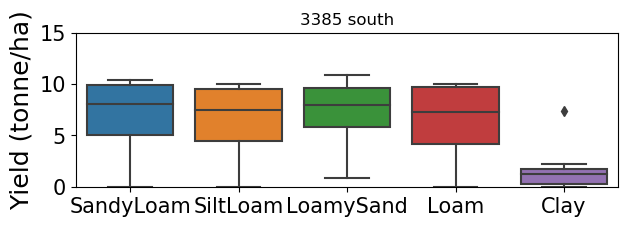

3006


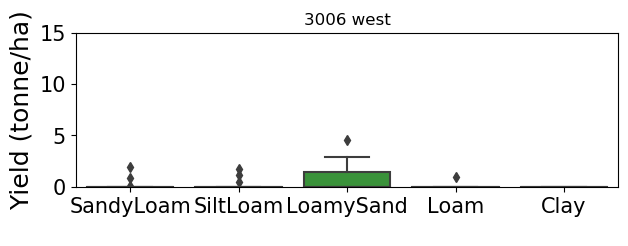

622


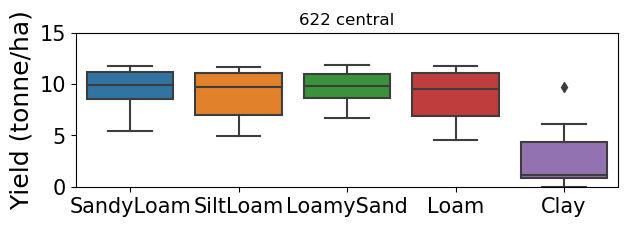

11750


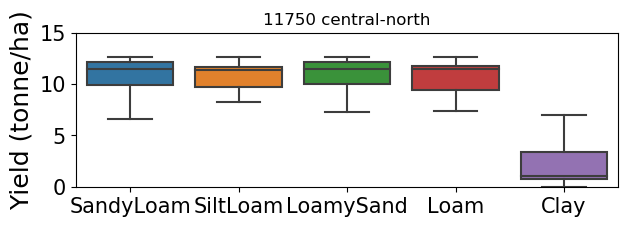

14407


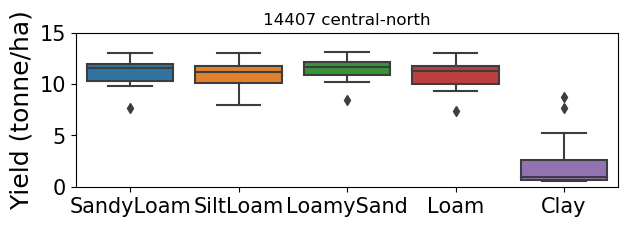

7725


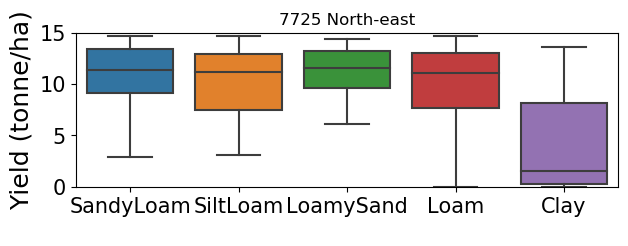

5162


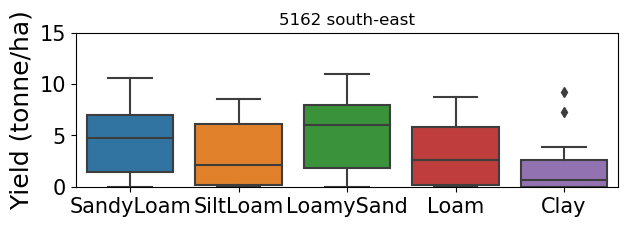

In [20]:
location_dict = {3385:'3385 south',3006:'3006 west',622:'622 central',
                 11750:'11750 central-north',14407:'14407 central-north',
                 7725:'7725 North-east',5162:'5162 south-east',}
for i in all_outputs:
    #create figure
    print(i)
    fig,ax=plt.subplots(1,1,figsize=(7,2),)

    # create box plot
    sns.boxplot(data=all_outputs[i],x='label',y='Yield (tonne/ha)',ax=ax,)

    # labels and font sizes
    ax.tick_params(labelsize=15)
    ax.set_ylim([0,15])
    ax.set_xlabel(' ')
    ax.set_ylabel('Yield (tonne/ha)',fontsize=18)
    plt.title(location_dict[i])
    plt.show()

## iwc [25,15] pdate 11/15

running on 3385
running on 3006
running on 622
running on 11750
running on 14407
running on 7725
running on 5162


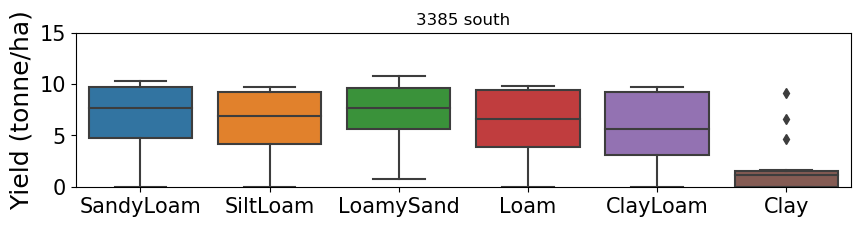

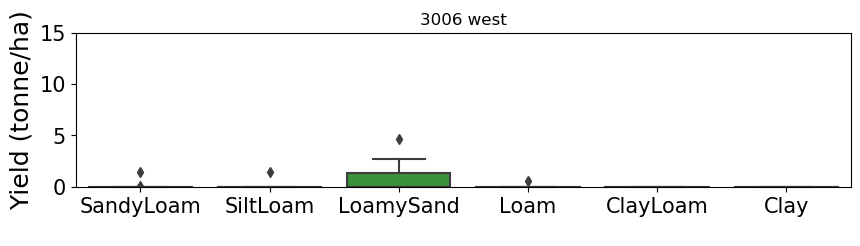

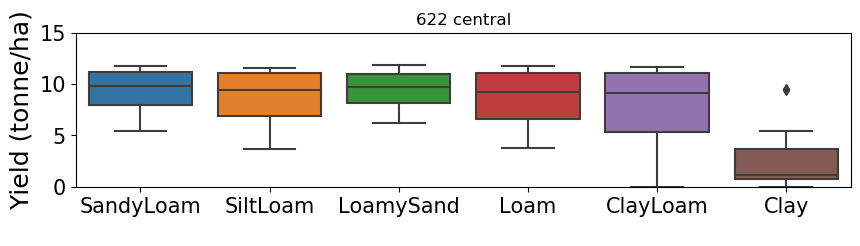

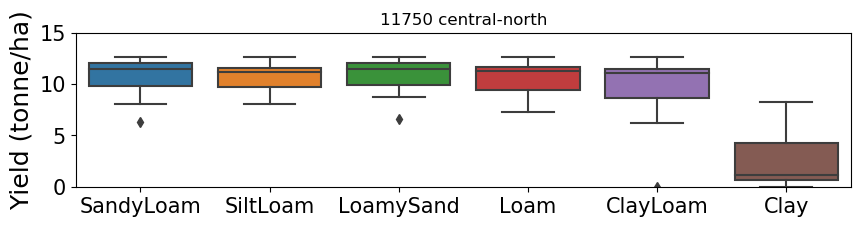

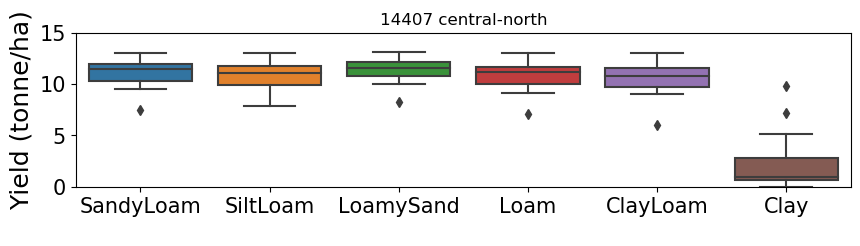

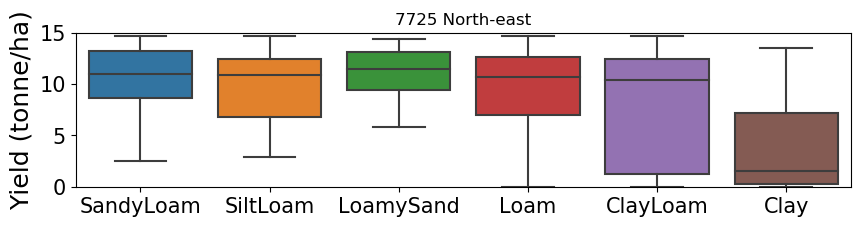

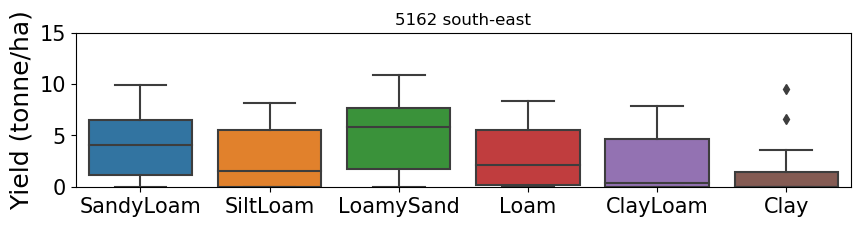

In [17]:
iwc_val = [25,15]
all_stations_results = {}
for i in [3385,3006,622,11750,14407,7725,5162]:#range(1,14664,1):
    print("running on " + str(i))

    filepath = os.path.join(project_path,weather_path,"station_"+ str(i) +"_weather.csv")
    #filepath= os.path.join(project_path,"Weather","station_weather.csv")
    weather_data = pd.read_csv(filepath)
    weather_data["Date"] = pd.to_datetime(weather_data["Date"])
    
    soil_list = ['SandyLoam','SiltLoam', 'LoamySand', 'Loam','ClayLoam','Clay']
    station_result = {}
    for j in soil_list:    
        # split soil into 2 layers (with identical soil properties) for different initialization
        temp_sol = SoilClass(soilType=j)
        custom_sol = SoilClass(soilType='custom')   
    
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
    
        maize = CropClass('Maize', PlantingDate='11/15',PlantPop=35_000)
        InitWC = InitWCClass(wc_type=wc_type_,
                            Method='Layer',#'Depth',#'Layer',
                            depth_layer=[1,2],#,2,3],#[1,2,3,4,5,6,7,8,9,10,11,12],
                            value=iwc_val) # 0.2 or dynamic (Noemi's soilmoisture)/percent of rainfall
       # print(soil_class.profile)
        #exit()
        model = AquaCropModel(SimStartTime=f'{2000}/11/15',
                              SimEndTime=f'{2014}/05/30',
                              wdf=weather_data,
                              Soil=custom_sol,
                              Crop=maize,
                              InitWC=InitWC)

        # initilize model
        model.initialize()
        # run model till termination
        model.step(till_termination=True)

        station_result[j] = model.Outputs.Final
        
    all_stations_results[i] = station_result

all_outputs = {}
station_list = [3385,3006,622,11750,14407,7725,5162]
for s in station_list:
    names=soil_list
    #combine our two output files
    single_station = []
    for i in names:
        single_station.append(all_stations_results[s][i])

    outlist=[]
    for i in range(len(single_station)): # go through our two output files
        temp = pd.DataFrame(single_station[i]['Yield (tonne/ha)']) # extract the seasonal yield data
        temp['label']=names[i] # add the soil type label
        outlist.append(temp) # save processed results

    # combine results
    station_outputs = pd.concat(outlist,axis=0)
    all_outputs[s] = station_outputs
    
location_dict = {3385:'3385 south',3006:'3006 west',622:'622 central',
                 11750:'11750 central-north',14407:'14407 central-north',
                 7725:'7725 North-east',5162:'5162 south-east',}
for i in all_outputs:
    #create figure
   # print(i)
    fig,ax=plt.subplots(1,1,figsize=(10,2),)

    # create box plot
    sns.boxplot(data=all_outputs[i],x='label',y='Yield (tonne/ha)',ax=ax,)

    # labels and font sizes
    ax.tick_params(labelsize=15)
    ax.set_ylim([0,15])
    ax.set_xlabel(' ')
    ax.set_ylabel('Yield (tonne/ha)',fontsize=18)
    plt.title(location_dict[i])
    plt.show()

## iwc [45, 35] pdate 11/15

running on 3385
running on 3006
running on 622
running on 11750
running on 14407
running on 7725
running on 5162


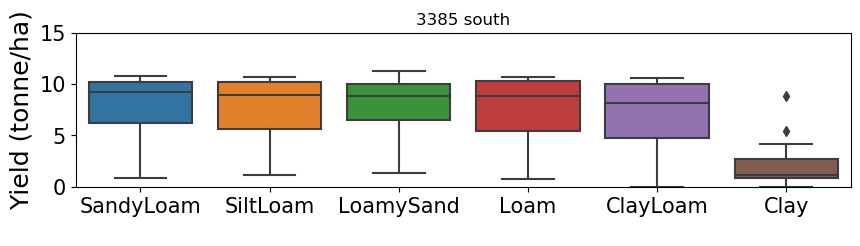

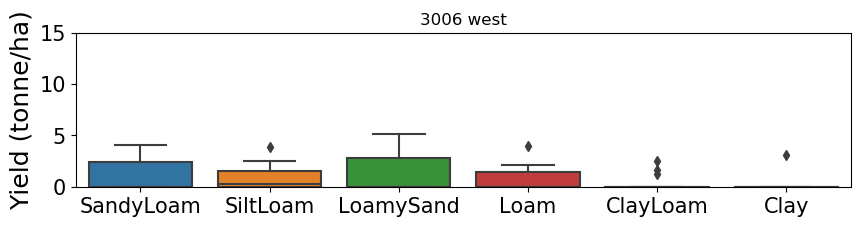

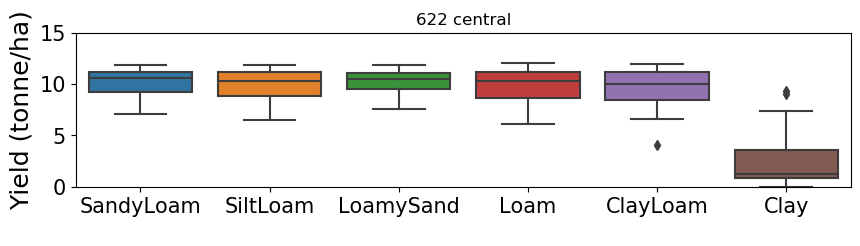

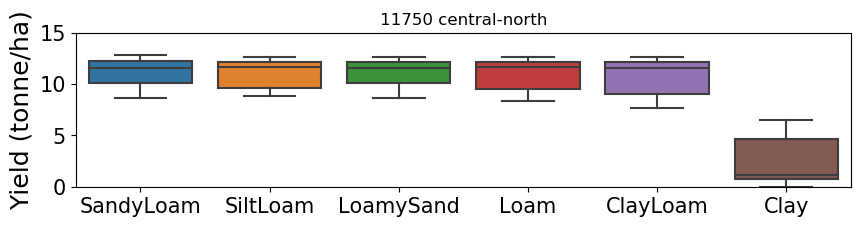

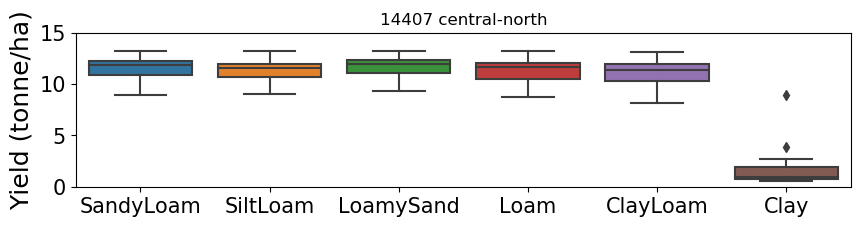

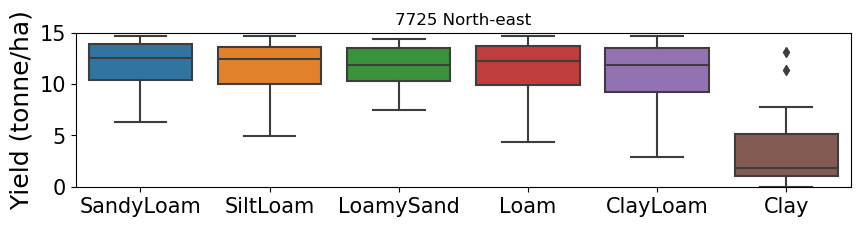

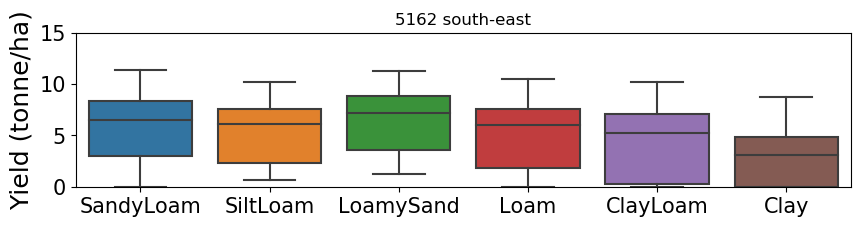

In [16]:
iwc_val = [45,35]
all_stations_results = {}
for i in [3385,3006,622,11750,14407,7725,5162]:#range(1,14664,1):
    print("running on " + str(i))

    filepath = os.path.join(project_path,weather_path,"station_"+ str(i) +"_weather.csv")
    #filepath= os.path.join(project_path,"Weather","station_weather.csv")
    weather_data = pd.read_csv(filepath)
    weather_data["Date"] = pd.to_datetime(weather_data["Date"])
    
    soil_list = ['SandyLoam','SiltLoam', 'LoamySand', 'Loam','ClayLoam','Clay']
    station_result = {}
    for j in soil_list:    
        # split soil into 2 layers (with identical soil properties) for different initialization
        temp_sol = SoilClass(soilType=j)
        custom_sol = SoilClass(soilType='custom')   
    
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
    
        maize = CropClass('Maize', PlantingDate='11/15',PlantPop=35_000)
        InitWC = InitWCClass(wc_type=wc_type_,
                            Method='Layer',#'Depth',#'Layer',
                            depth_layer=[1,2],#,2,3],#[1,2,3,4,5,6,7,8,9,10,11,12],
                            value=iwc_val) # 0.2 or dynamic (Noemi's soilmoisture)/percent of rainfall
       # print(soil_class.profile)
        #exit()
        model = AquaCropModel(SimStartTime=f'{2000}/11/15',
                              SimEndTime=f'{2014}/05/30',
                              wdf=weather_data,
                              Soil=custom_sol,
                              Crop=maize,
                              InitWC=InitWC)

        # initilize model
        model.initialize()
        # run model till termination
        model.step(till_termination=True)

        station_result[j] = model.Outputs.Final
        
    all_stations_results[i] = station_result

all_outputs = {}
station_list = [3385,3006,622,11750,14407,7725,5162]
for s in station_list:
    names=soil_list
    #combine our two output files
    single_station = []
    for i in names:
        single_station.append(all_stations_results[s][i])

    outlist=[]
    for i in range(len(single_station)): # go through our two output files
        temp = pd.DataFrame(single_station[i]['Yield (tonne/ha)']) # extract the seasonal yield data
        temp['label']=names[i] # add the soil type label
        outlist.append(temp) # save processed results

    # combine results
    station_outputs = pd.concat(outlist,axis=0)
    all_outputs[s] = station_outputs
    
location_dict = {3385:'3385 south',3006:'3006 west',622:'622 central',
                 11750:'11750 central-north',14407:'14407 central-north',
                 7725:'7725 North-east',5162:'5162 south-east',}
for i in all_outputs:
    #create figure
   # print(i)
    fig,ax=plt.subplots(1,1,figsize=(10,2),)

    # create box plot
    sns.boxplot(data=all_outputs[i],x='label',y='Yield (tonne/ha)',ax=ax,)

    # labels and font sizes
    ax.tick_params(labelsize=15)
    ax.set_ylim([0,15])
    ax.set_xlabel(' ')
    ax.set_ylabel('Yield (tonne/ha)',fontsize=18)
    plt.title(location_dict[i])
    plt.show()

## initwc [25, 15], pdate later (11/30)

running on 3385
running on 3006
running on 622
running on 11750
running on 14407
running on 7725
running on 5162


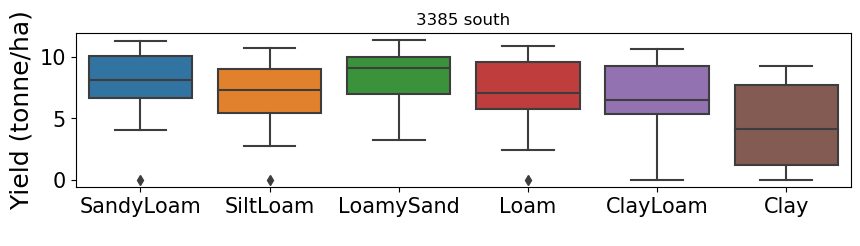

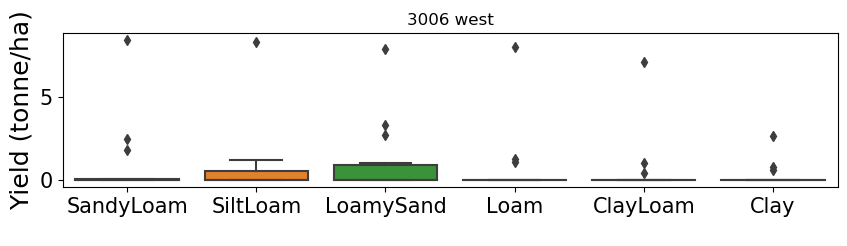

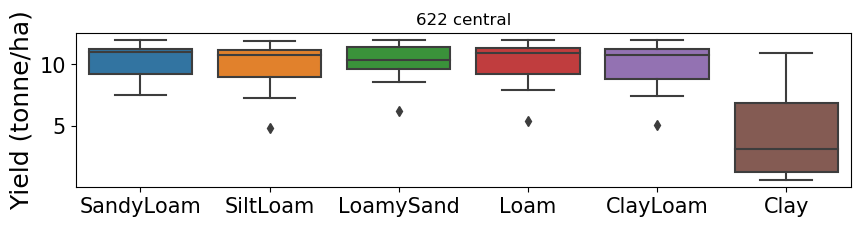

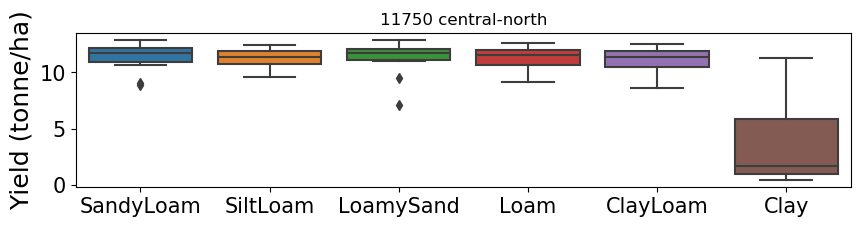

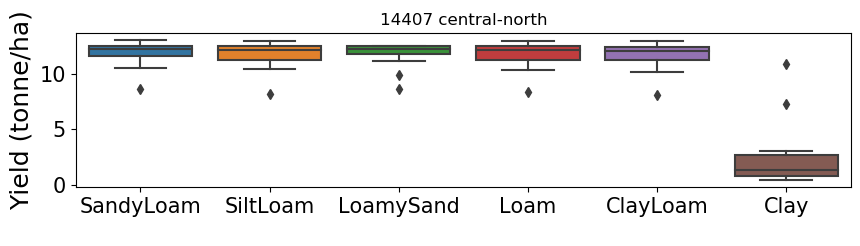

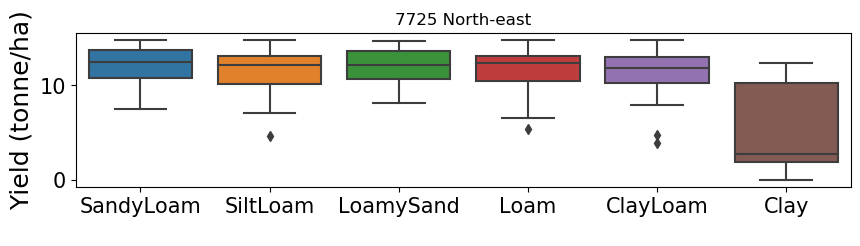

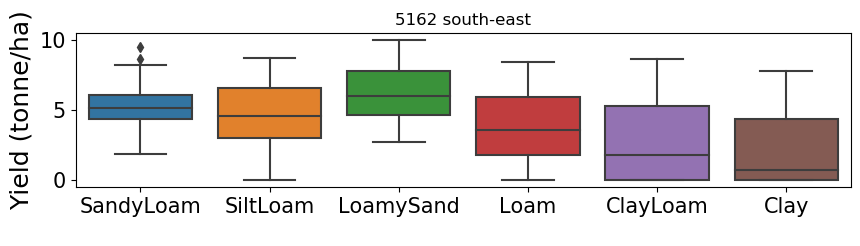

In [12]:
iwc_val = [25,15]
all_stations_results = {}
for i in [3385,3006,622,11750,14407,7725,5162]:#range(1,14664,1):
    print("running on " + str(i))

    filepath = os.path.join(project_path,weather_path,"station_"+ str(i) +"_weather.csv")
    #filepath= os.path.join(project_path,"Weather","station_weather.csv")
    weather_data = pd.read_csv(filepath)
    weather_data["Date"] = pd.to_datetime(weather_data["Date"])
    
    soil_list = ['SandyLoam','SiltLoam', 'LoamySand', 'Loam','ClayLoam','Clay']
    station_result = {}
    for j in soil_list:    
        # split soil into 2 layers (with identical soil properties) for different initialization
        temp_sol = SoilClass(soilType=j)
        custom_sol = SoilClass(soilType='custom')   
    
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
    
        maize = CropClass('Maize', PlantingDate='11/30',PlantPop=35_000)
        InitWC = InitWCClass(wc_type=wc_type_,
                            Method='Layer',#'Depth',#'Layer',
                            depth_layer=[1,2],#,2,3],#[1,2,3,4,5,6,7,8,9,10,11,12],
                            value=iwc_val) # 0.2 or dynamic (Noemi's soilmoisture)/percent of rainfall
       # print(soil_class.profile)
        #exit()
        model = AquaCropModel(SimStartTime=f'{2000}/11/15',
                              SimEndTime=f'{2014}/05/30',
                              wdf=weather_data,
                              Soil=custom_sol,
                              Crop=maize,
                              InitWC=InitWC)

        # initilize model
        model.initialize()
        # run model till termination
        model.step(till_termination=True)

        station_result[j] = model.Outputs.Final
        
    all_stations_results[i] = station_result

all_outputs = {}
station_list = [3385,3006,622,11750,14407,7725,5162]
for s in station_list:
    names=soil_list
    #combine our two output files
    single_station = []
    for i in names:
        single_station.append(all_stations_results[s][i])

    outlist=[]
    for i in range(len(single_station)): # go through our two output files
        temp = pd.DataFrame(single_station[i]['Yield (tonne/ha)']) # extract the seasonal yield data
        temp['label']=names[i] # add the soil type label
        outlist.append(temp) # save processed results

    # combine results
    station_outputs = pd.concat(outlist,axis=0)
    all_outputs[s] = station_outputs
    
location_dict = {3385:'3385 south',3006:'3006 west',622:'622 central',
                 11750:'11750 central-north',14407:'14407 central-north',
                 7725:'7725 North-east',5162:'5162 south-east',}
for i in all_outputs:
    #create figure
   # print(i)
    fig,ax=plt.subplots(1,1,figsize=(10,2),)

    # create box plot
    sns.boxplot(data=all_outputs[i],x='label',y='Yield (tonne/ha)',ax=ax,)

    # labels and font sizes
    ax.tick_params(labelsize=15)
    ax.set_xlabel(' ')
    ax.set_ylabel('Yield (tonne/ha)',fontsize=18)
    plt.title(location_dict[i])
    plt.show()

## iwc [25,15], pdate 12/15

running on 3385
running on 3006
running on 622
running on 11750
running on 14407
running on 7725
running on 5162


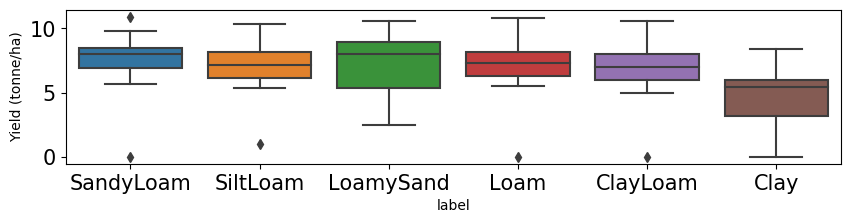

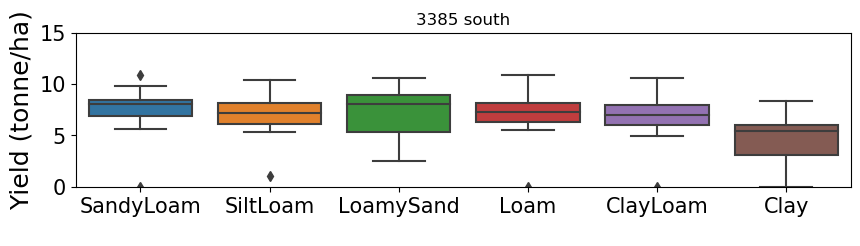

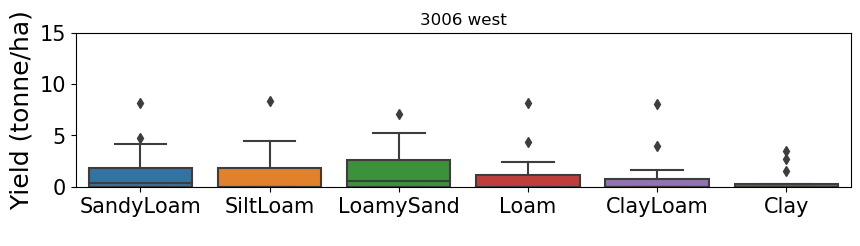

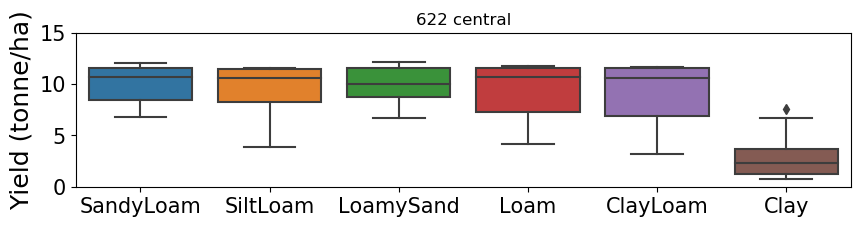

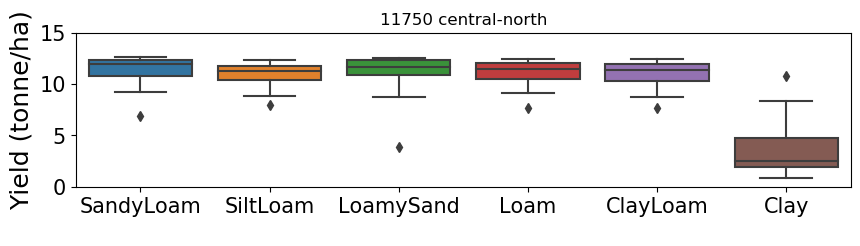

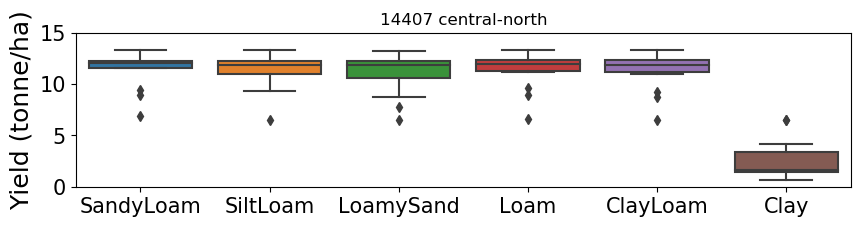

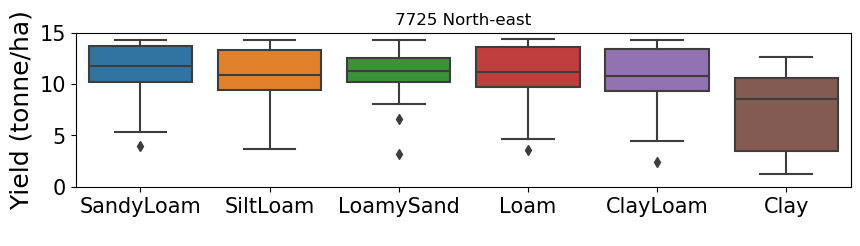

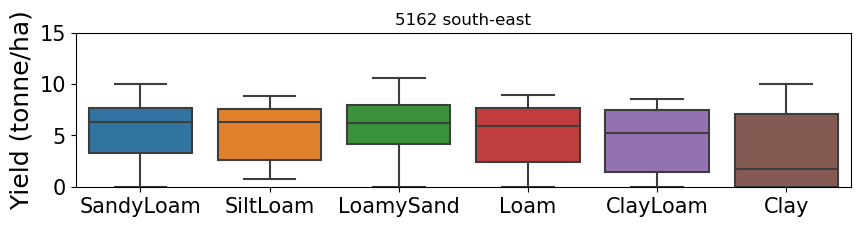

In [15]:
iwc_val = [25,15]
all_stations_results = {}
for i in [3385,3006,622,11750,14407,7725,5162]:#range(1,14664,1):
    print("running on " + str(i))

    filepath = os.path.join(project_path,weather_path,"station_"+ str(i) +"_weather.csv")
    #filepath= os.path.join(project_path,"Weather","station_weather.csv")
    weather_data = pd.read_csv(filepath)
    weather_data["Date"] = pd.to_datetime(weather_data["Date"])
    
    soil_list = ['SandyLoam','SiltLoam', 'LoamySand', 'Loam','ClayLoam','Clay']
    station_result = {}
    for j in soil_list:    
        # split soil into 2 layers (with identical soil properties) for different initialization
        temp_sol = SoilClass(soilType=j)
        custom_sol = SoilClass(soilType='custom')   
    
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
    
        maize = CropClass('Maize', PlantingDate='12/15',PlantPop=35_000)
        InitWC = InitWCClass(wc_type=wc_type_,
                            Method='Layer',#'Depth',#'Layer',
                            depth_layer=[1,2],#,2,3],#[1,2,3,4,5,6,7,8,9,10,11,12],
                            value=iwc_val) # 0.2 or dynamic (Noemi's soilmoisture)/percent of rainfall
       # print(soil_class.profile)
        #exit()
        model = AquaCropModel(SimStartTime=f'{2000}/11/15',
                              SimEndTime=f'{2014}/05/30',
                              wdf=weather_data,
                              Soil=custom_sol,
                              Crop=maize,
                              InitWC=InitWC)

        # initilize model
        model.initialize()
        # run model till termination
        model.step(till_termination=True)

        station_result[j] = model.Outputs.Final
        
    all_stations_results[i] = station_result

all_outputs = {}
station_list = [3385,3006,622,11750,14407,7725,5162]
for s in station_list:
    names=soil_list
    #combine our two output files
    single_station = []
    for i in names:
        single_station.append(all_stations_results[s][i])

    outlist=[]
    for i in range(len(single_station)): # go through our two output files
        temp = pd.DataFrame(single_station[i]['Yield (tonne/ha)']) # extract the seasonal yield data
        temp['label']=names[i] # add the soil type label
        outlist.append(temp) # save processed results

    # combine results
    station_outputs = pd.concat(outlist,axis=0)
    all_outputs[s] = station_outputs
    
location_dict = {3385:'3385 south',3006:'3006 west',622:'622 central',
                 11750:'11750 central-north',14407:'14407 central-north',
                 7725:'7725 North-east',5162:'5162 south-east',}
for i in all_outputs:
    #create figure
   # print(i)
    fig,ax=plt.subplots(1,1,figsize=(10,2),)

    # create box plot
    sns.boxplot(data=all_outputs[i],x='label',y='Yield (tonne/ha)',ax=ax,)

    # labels and font sizes
    ax.tick_params(labelsize=15)
    ax.set_ylim([0,15])
    ax.set_xlabel(' ')
    ax.set_ylabel('Yield (tonne/ha)',fontsize=18)
    plt.title(location_dict[i])
    plt.show()

## iwc [25, 15] pdate 11/15, planting density 15k/ha

running on 3385
running on 3006
running on 622
running on 11750
running on 14407
running on 7725
running on 5162


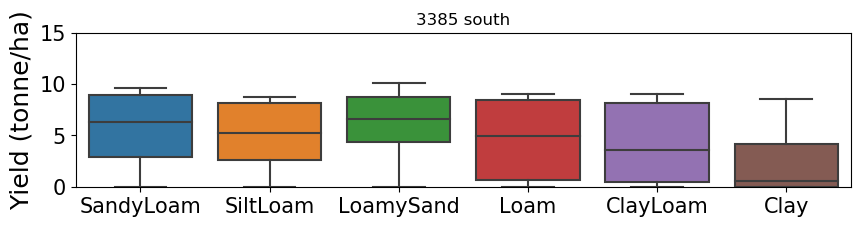

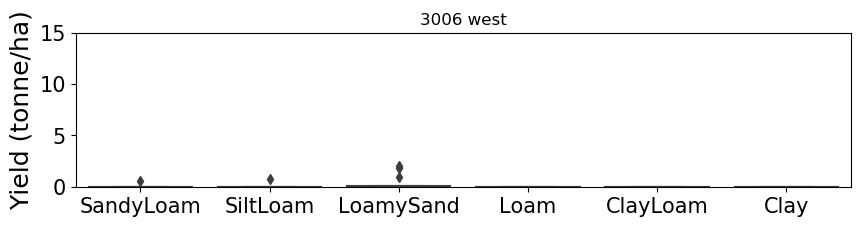

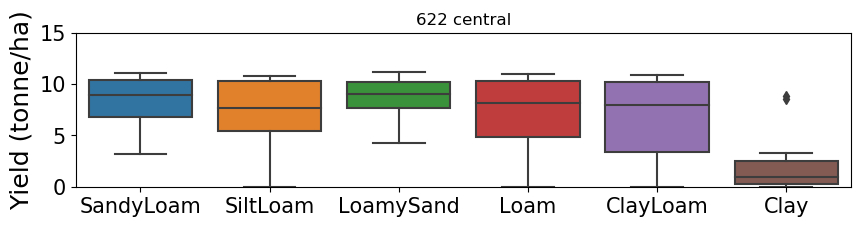

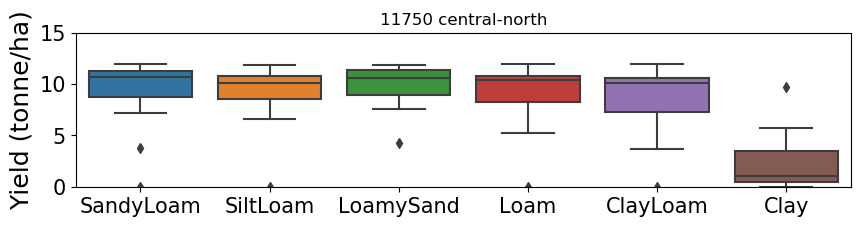

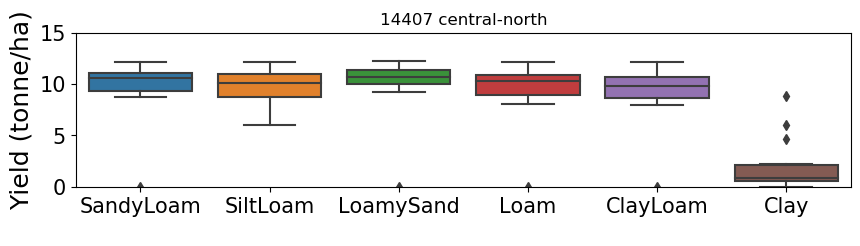

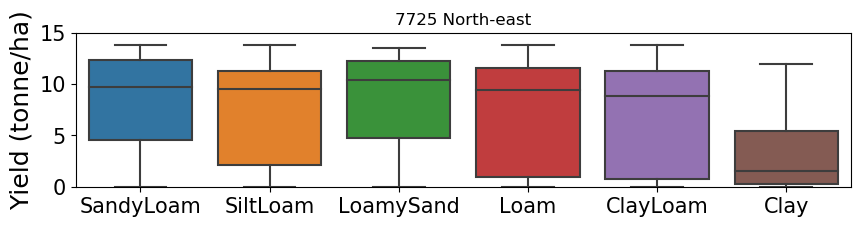

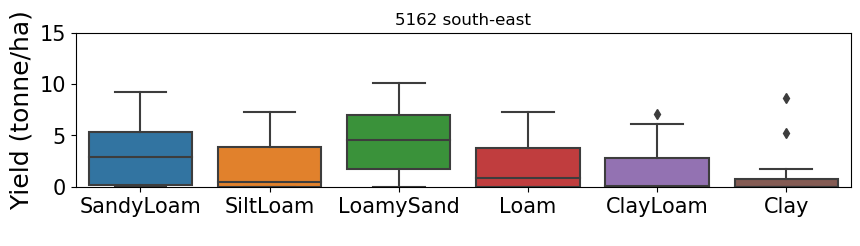

In [21]:
iwc_val = [25,15]
all_stations_results = {}
for i in [3385,3006,622,11750,14407,7725,5162]:#range(1,14664,1):
    print("running on " + str(i))

    filepath = os.path.join(project_path,weather_path,"station_"+ str(i) +"_weather.csv")
    #filepath= os.path.join(project_path,"Weather","station_weather.csv")
    weather_data = pd.read_csv(filepath)
    weather_data["Date"] = pd.to_datetime(weather_data["Date"])
    
    soil_list = ['SandyLoam','SiltLoam', 'LoamySand', 'Loam','ClayLoam','Clay']
    station_result = {}
    for j in soil_list:    
        # split soil into 2 layers (with identical soil properties) for different initialization
        temp_sol = SoilClass(soilType=j)
        custom_sol = SoilClass(soilType='custom')   
    
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
        custom_sol.add_layer(thickness=0.6,thWP=temp_sol.profile.th_wp[0],
                  thFC=temp_sol.profile.th_fc[0],
                  thS=temp_sol.profile.th_s[0],
                  Ksat=temp_sol.profile.Ksat[0],
                  penetrability=temp_sol.profile.penetrability[0])
    
        maize = CropClass('Maize', PlantingDate='11/15',PlantPop=15_000)
        InitWC = InitWCClass(wc_type=wc_type_,
                            Method='Layer',#'Depth',#'Layer',
                            depth_layer=[1,2],#,2,3],#[1,2,3,4,5,6,7,8,9,10,11,12],
                            value=iwc_val) # 0.2 or dynamic (Noemi's soilmoisture)/percent of rainfall
       # print(soil_class.profile)
        #exit()
        model = AquaCropModel(SimStartTime=f'{2000}/11/15',
                              SimEndTime=f'{2014}/05/30',
                              wdf=weather_data,
                              Soil=custom_sol,
                              Crop=maize,
                              InitWC=InitWC)

        # initilize model
        model.initialize()
        # run model till termination
        model.step(till_termination=True)

        station_result[j] = model.Outputs.Final
        
    all_stations_results[i] = station_result

all_outputs = {}
station_list = [3385,3006,622,11750,14407,7725,5162]
for s in station_list:
    names=soil_list
    #combine our two output files
    single_station = []
    for i in names:
        single_station.append(all_stations_results[s][i])

    outlist=[]
    for i in range(len(single_station)): # go through our two output files
        temp = pd.DataFrame(single_station[i]['Yield (tonne/ha)']) # extract the seasonal yield data
        temp['label']=names[i] # add the soil type label
        outlist.append(temp) # save processed results

    # combine results
    station_outputs = pd.concat(outlist,axis=0)
    all_outputs[s] = station_outputs
    
location_dict = {3385:'3385 south',3006:'3006 west',622:'622 central',
                 11750:'11750 central-north',14407:'14407 central-north',
                 7725:'7725 North-east',5162:'5162 south-east',}
for i in all_outputs:
    #create figure
   # print(i)
    fig,ax=plt.subplots(1,1,figsize=(10,2),)

    # create box plot
    sns.boxplot(data=all_outputs[i],x='label',y='Yield (tonne/ha)',ax=ax,)

    # labels and font sizes
    ax.tick_params(labelsize=15)
    ax.set_ylim([0,15])
    ax.set_xlabel(' ')
    ax.set_ylabel('Yield (tonne/ha)',fontsize=18)
    plt.title(location_dict[i])
    plt.show()